# Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [3]:
sleep_data=pd.read_csv('/content/drive/MyDrive/dartb/2025_S/Sleep_health_and_lifestyle_dataset.csv')

#head() for display the first 5 rows
sleep_data.head().style.set_properties(**{'background-color': '#4A235A',
                                          'color': '#E2EEF3'}) #for colored output

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.100000,6,42,6,Overweight,126/83,77,4200,nan
1,2,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
2,3,Male,28,Doctor,6.200000,6,60,8,Normal,125/80,75,10000,nan
3,4,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.900000,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Statistical Information

기초 탐색
- 데이터 구조 확인 (`head`, `info`)
- 수치형과 범주형 통계 요약(`describe`)

In [7]:
shape = colored(sleep_data.shape, "magenta",None, attrs=["blink"])
print('The dimention of data is :',shape)

The dimention of data is : (374, 13)


In [8]:
sleep_data.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
#for statistical info
sleep_data.describe().style.background_gradient(cmap='BuPu') #for colored output

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [10]:
# 범주형 요약
sleep_data.describe(include='O').style.set_properties(**{'background-color': '#4A235A',
                                                      'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


# EDA

In [11]:
columns_name=colored(sleep_data.columns, 'magenta',None, attrs=["blink"]) #for show names of columns
print(columns_name) # 변수 이름 확인

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [12]:
#for colored text output ( Text ,Text colors ,Text highlights , Attributes)
number_of_values=colored(sleep_data.nunique(), "magenta",None, attrs=["blink"])

print(number_of_values) #for number of values of columns(고유값 개수)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64


### 변수 간 관계 시각화(`pairplot`, `hue=Sleep Disorder`)

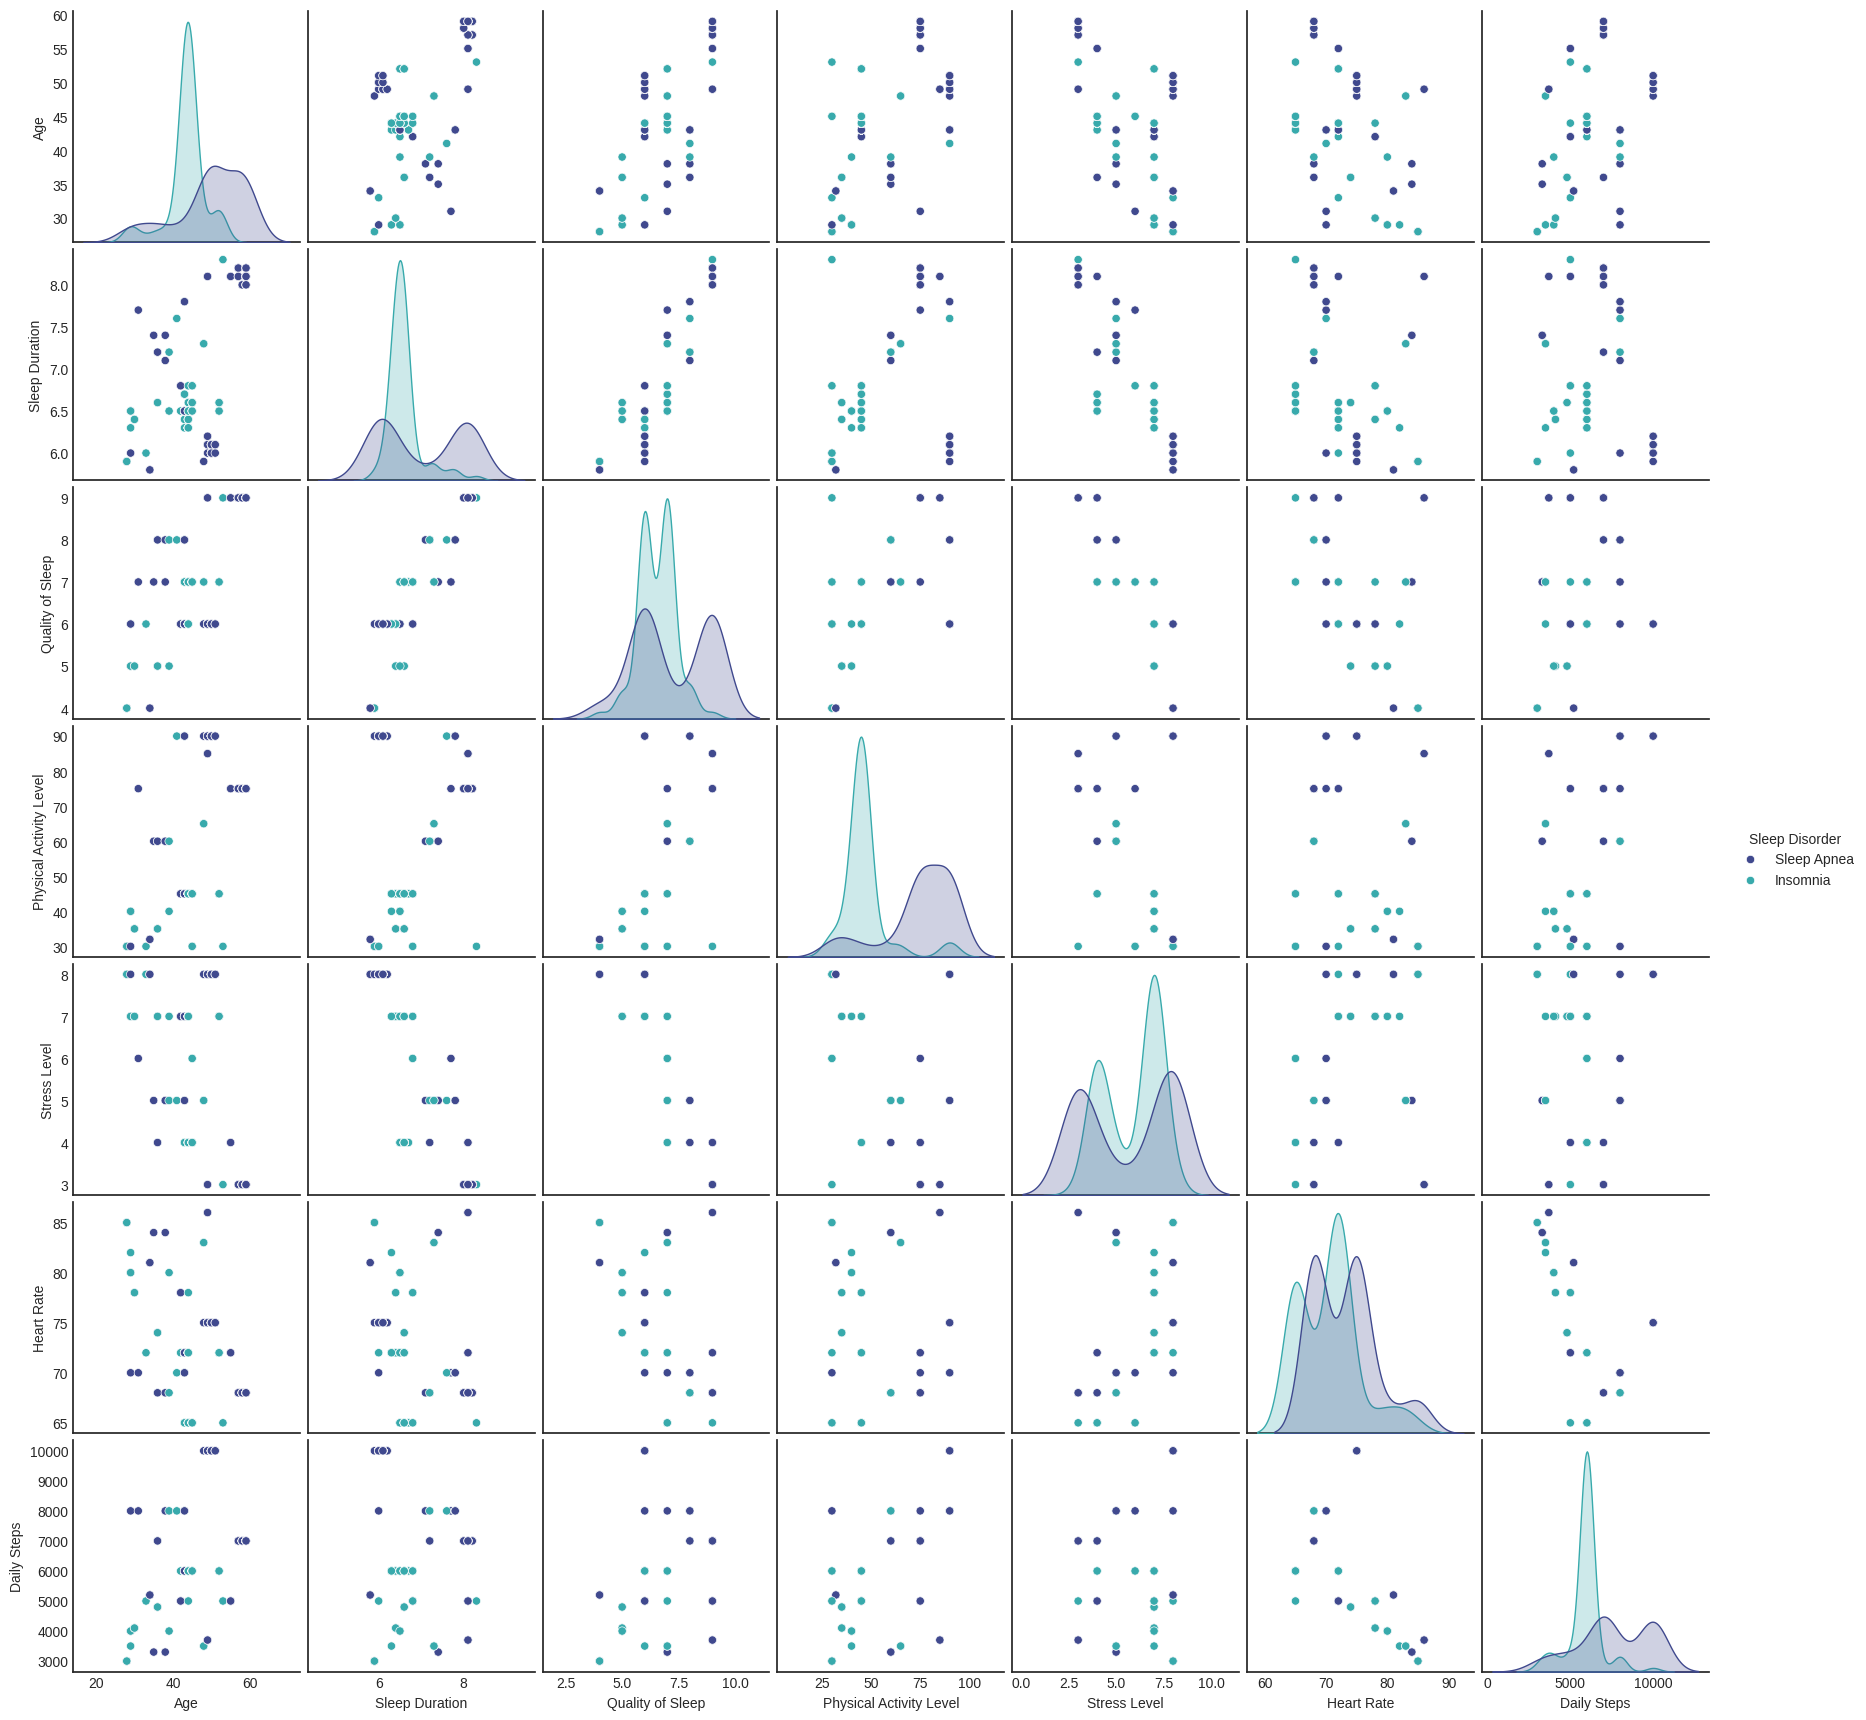

In [15]:
plt.style.use('seaborn-v0_8-white')
sns.pairplot(data=sleep_data.drop('Person ID',axis=1),hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

Percentage of persons have sleep disorder or not

In [16]:
classes=colored(sleep_data['Sleep Disorder'].unique(), "magenta",None, attrs=["blink"])
print('The outputs from the classification are :',classes)

The outputs from the classification are : [nan 'Sleep Apnea' 'Insomnia']


###타겟 변수 분석: Sleep Disorder

수면 장애 유무 비율 확인
- 히스토그램 시각화(`plotly 활용)

In [17]:
sleep_data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [18]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)


fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

### 성별과 수면장애의 관계 분석

그룹별 성별 분포 비율을 파이 차트로 표현

In [19]:
Gender=colored(sleep_data['Gender'].unique(), "magenta",None, attrs=["blink"])
print('The values of Sex column are :',Gender)

The values of Sex column are : ['Male' 'Female']


In [20]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male      41
                Female    36
Sleep Apnea     Female    67
                Male      11
Name: count, dtype: int64

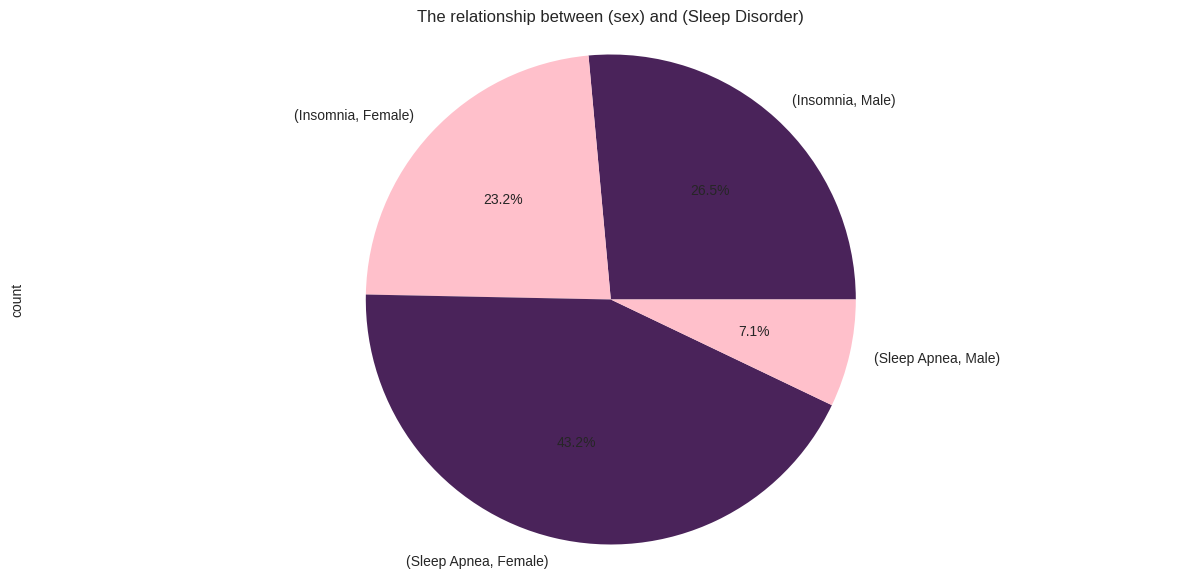

In [21]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=['#4A235A','pink','#4A235A','pink','#4A235A','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

### 직업과 수면장애의 관계 분석

In [22]:
jobs=colored(sleep_data['Occupation'].unique(), "magenta",None, attrs=["blink"])
print('The types of jobs that exist are :',jobs)

The types of jobs that exist are : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [23]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
Name: count, dtype: int64

In [79]:
fig=px.treemap(sleep_data,path=[px.Constant('jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()

### 수면의 질과 수면 장애가 수면시간에 미치는 영향

In [30]:
sleep_data.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').style.background_gradient(cmap='BuPu')

Sleep Disorder,Insomnia,Sleep Apnea
Quality of Sleep,,
4,5.900000,5.850000
5,6.500000,6.500000
6,6.371875,6.118182
7,6.638235,7.500000
8,7.520000,7.366667
9,8.300000,8.096875


In [32]:
filtered_data = sleep_data.dropna(subset=['Sleep Disorder', 'Quality of Sleep', 'Sleep Duration'])

fig = px.sunburst(filtered_data,
                  path=[px.Constant('Sleep quality'), 'Sleep Disorder', 'Quality of Sleep'],
                  values='Sleep Duration',
                  color='Sleep Disorder',
                  color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
                  hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep</b>',
                  title_font={'size': 25})

fig.show()

### 신체적 활동이 수면장애 미치는 영향

In [33]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 violinmode='overlay')


fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

### 나이가 수면 장애에 미치는 영향

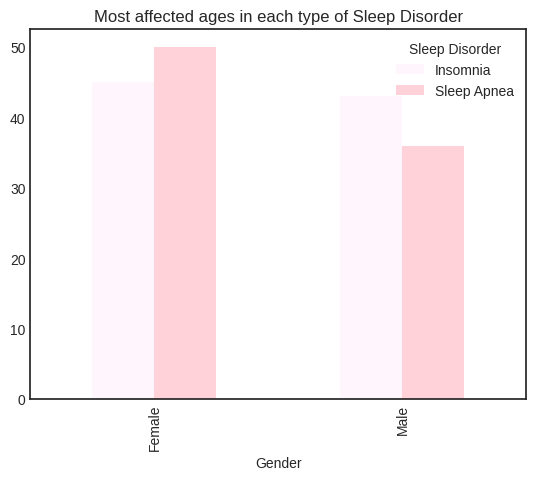

In [35]:
sleep_data.pivot_table(index='Gender',
                       columns='Sleep Disorder',
                       values='Age',
                       aggfunc='median').plot(kind='bar',
                                              color={'#FFF3FD','#4A235A','pink'},
                                              title='Most affected ages in each type of Sleep Disorder',
                                              label='Age',alpha=.7)


plt.show()

In [36]:
fig=px.ecdf(sleep_data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 수면 시간이 수면 장애에 미치는 영향

In [37]:
fig=px.histogram(sleep_data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)



fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)




fig.show()

### 건강 상태가 수면 장애에 미치는 영향

In [38]:
fig=px.scatter_3d(sleep_data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

In [39]:
sleep_data.pivot_table(index='Stress Level',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

### 스트레스 정도가 수면장애에 미치는 영향

In [40]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
BMI_Category=colored(sleep_data['BMI Category'].unique(), "magenta",None, attrs=["blink"])
print('The values of BMI Category column are :',BMI_Category)

The values of BMI Category column are : ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [42]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

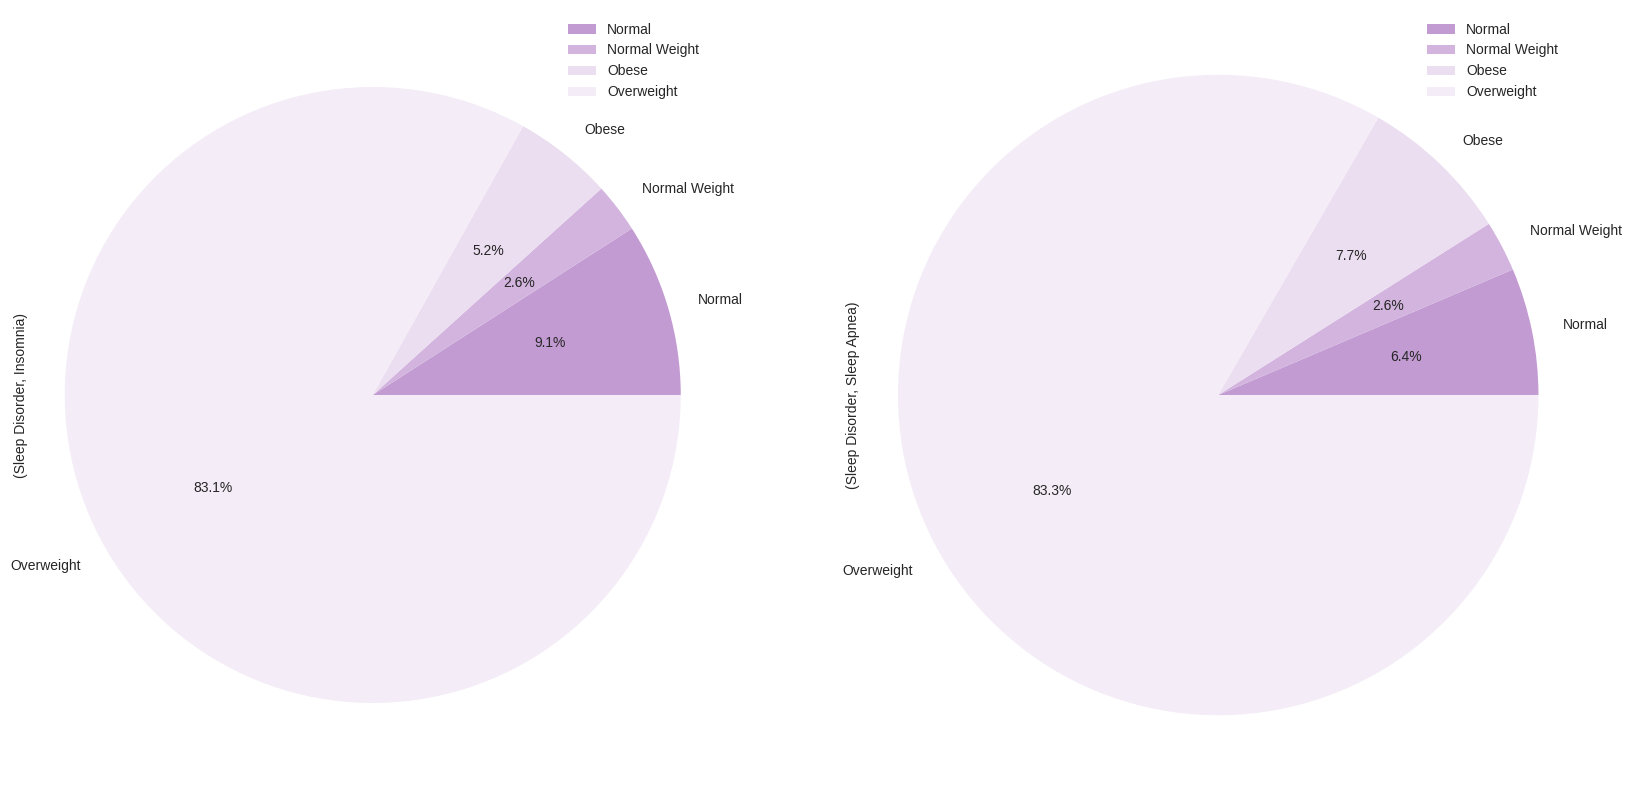

In [43]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

# Data Preprocessing

In [44]:
sleep_data.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


- 원문 데이터셋에는 결측값이 없던데 나는 왜...?

<Axes: >

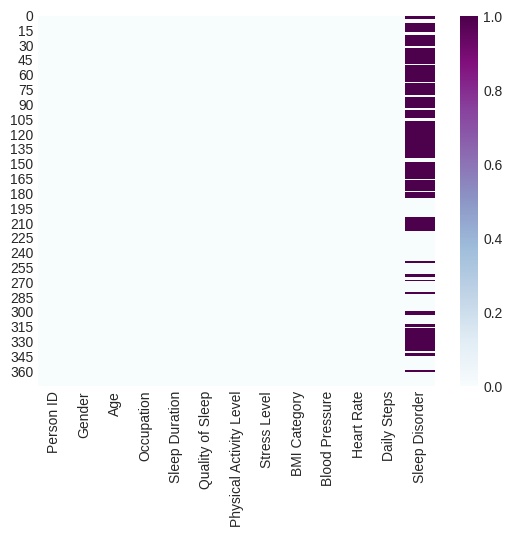

In [45]:
sns.heatmap(sleep_data.isna(),cmap='BuPu')

In [46]:
sleep_data['Sleep Disorder'] = sleep_data.groupby('Gender')['Sleep Disorder'].transform(lambda x: x.fillna(x.mode()[0]))

- (optional) 그룹별 최빈값으로 결측값 채움

In [47]:
sleep_data.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [48]:
sleep_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [49]:
sleep_data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

혈압(`Blood Pressure`) 데이터를 이진 변수(0 또는 1)로 변환

In [50]:
sleep_data['Blood Pressure']=sleep_data['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

WHY?

- 문자열 형태의 혈압 수치를 그대로 모델에 넣을 수 없음
- 수치형 분석이나 머신러닝 모델 학습을 위해선 → 정상/비정상으로 구분해주는 전처리 필요


연속형 변수들을 구간으로 나누어서 **범주형 변수처럼 다루도록 구간화**하는 전처리 과정

-> 각 변수에 대해 `pd.cut()`을 사용해서 자동적으로 지정된 개수만큼 구간을 나눠주는 방식

In [51]:
sleep_data["Age"]=pd.cut(sleep_data["Age"],2)
sleep_data["Heart Rate"]=pd.cut(sleep_data["Heart Rate"],4)
sleep_data["Daily Steps"]=pd.cut(sleep_data["Daily Steps"],4)
sleep_data["Sleep Duration"]=pd.cut(sleep_data["Sleep Duration"],3)
sleep_data["Physical Activity Level"]=pd.cut(sleep_data["Physical Activity Level"],4)

WHY?

- 연속형 데이터를 범주형으로 바꿔서 시각화하거나 분할표 분석, 빈도 분석, 모델에 쓰기 쉽게 만들기 위함

### 범주형 변수 Label Encoding 처리

In [52]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep_data[label]=LE.fit_transform(sleep_data[label])

In [53]:
sleep_data.drop(['Person ID'], axis=1, inplace=True) # 불필요한 변수 제거

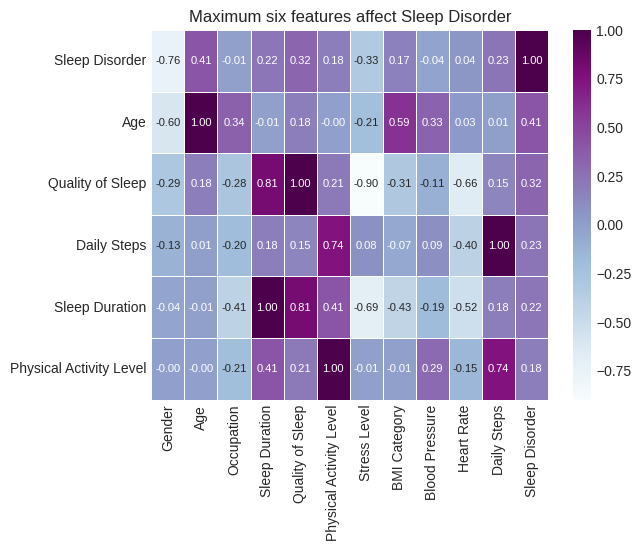

In [54]:
# 상관관계 분석 및 시각화
correlation=sleep_data.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder"). # 타겟변수와 상관관계가 큰 변수 6개 추출
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

# Data Spliting

머닝러신 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할
1. `sleep_data`를 x, y로 분할
2. x, y를 각각 train, test 데이터로 분할

In [55]:
x=sleep_data.iloc[:,:-1]  # 마지막 열 제외 = 입력 변수
y=sleep_data.iloc[:,-1]. # 마지막 열 = 타겟 변수

x_shape=colored(x.shape, "magenta",None, attrs=["blink"])
y_shape=colored(y.shape, "magenta",None, attrs=["blink"])
print('The dimensions of x is : ',x_shape)
print('The dimensions of y is : ',y_shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

In [58]:
x_train_shape=colored(x_train.shape, "magenta",None, attrs=["blink"])
x_test_shape=colored(x_test.shape, "magenta",None, attrs=["blink"])
y_train_shape=colored(y_train.shape, "magenta",None, attrs=["blink"])
y_test_shape=colored(y_test.shape, "magenta",None, attrs=["blink"])

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (250, 11)
x test dimensions:  (124, 11)
y train dimensions : (250,)
y test dimensions : (124,)


# Data Modeling

In [59]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)

In [60]:
LR_training_score=colored(round(LR.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
LR_testing_score=colored(round(LR.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR training score : 96.0
LR testing score : 95.16


In [61]:
LR_y_pred=LR.predict(x_test)

## XGBClassifier Model

XGBoost 분류 모델(XGBClassifier)을 사용해서 학습 및 평가
- LogisticRegression과 동일한 구조지만, 더 강력한 트리 기반 앙상블 모델

In [62]:
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(x_train,y_train)

In [63]:
xgb_training_score=colored(round(xgb.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
xgb_testing_score=colored(round(xgb.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb training score : 97.2
xgb testing score : 91.94


In [64]:
xgb_y_pred=xgb.predict(x_test)

## CatBoostClassifier Model

CatBoostClassifier를 사용한 머신러닝 모델 학습 및 평가
- XGBoost와 같은 트리 기반의 앙상블 모델
- 범주형 변수에 강하고, 자동 인코딩 처리가 되는 장점

In [67]:
from catboost import CatBoostClassifier
CBC=CatBoostClassifier(verbose=False).fit(x_train,y_train)

In [68]:
CBC_training_score=colored(round(CBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
CBC_testing_score=colored(round(CBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC training score : 97.2
CBC testing score : 93.55


In [69]:
CBC_y_pred=CBC.predict(x_test)

## GradientBoostingClassifier Model

GradientBoostingClassifier를 사용한 머신러닝 모델 학습 및 평가
- 트리 기반의 앙상블 모델

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [71]:
GBC_training_score=colored(round(GBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
GBC_testing_score=colored(round(GBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 97.2
GBC testing score : 93.55


In [72]:
GBC_y_pred=GBC.predict(x_test)

## SVC Model

Support Vector Machine 기반의 분류 모델
- 마진이 최대가 되도록 초평면(Hyperplane)을 찾아 분류

In [73]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

In [74]:
svc_training_score=colored(round(svc.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
svc_testing_score=colored(round(svc.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("svc training score :",svc_training_score)
print("svc testing score :",svc_testing_score)

svc training score : 91.2
svc testing score : 87.9


- 트리 기반의 모델보다 성능이 낮음
- 속도가 느리고 하이퍼파라미터 조정이 필요

In [75]:
svc_y_pred=svc.predict(x_test)

| 모델명                            | 알고리즘 종류                       | 주요 특징                    | 장점                                   | 단점                                     |
| ------------------------------ | ----------------------------- | ------------------------ | ------------------------------------ | -------------------------------------- |
| **LogisticRegression**         | 선형 모델                         | 확률 기반 이진 분류              | 빠르고 단순<br>과적합 적음<br>기본 baseline으로 적합 | 복잡한 비선형 관계에 약함                         |
| **XGBClassifier**              | 트리 기반 앙상블 (Gradient Boosting) | 강력한 성능, 결측값 자동 처리        | 높은 정확도<br>하이퍼파라미터 조정 시 최상 성능 가능      | 튜닝 복잡<br>학습시간 다소 김                     |
| **CatBoostClassifier**         | 트리 기반 앙상블                     | 범주형 변수 자동 인코딩<br>빠르고 안정적 | 튜닝 적게 해도 잘 작동<br>범주형 처리 매우 강력        | 설치 필요<br>학습 시간 약간 김                    |
| **GradientBoostingClassifier** | 트리 기반 앙상블                     | 기본적인 Gradient Boosting   | Sklearn 내장으로 간편<br>안정적 성능            | 범주형 데이터 인코딩 직접 필요<br>속도는 CatBoost보다 느림 |
| **SVC**                        | 커널 기반 분류기 (SVM)               | 마진 최대화<br>고차원에 강함        | 복잡한 경계 학습 가능<br>소규모 데이터에 유리          | 느림<br>스케일링/튜닝 민감<br>대규모 데이터엔 부적합       |


# Models Evaluation

모델별 혼동행렬을 시각화하여, 각 모델이 수면장애 클래스를 얼마나 잘 분류했는지 비교

In [76]:
from sklearn.metrics import confusion_matrix

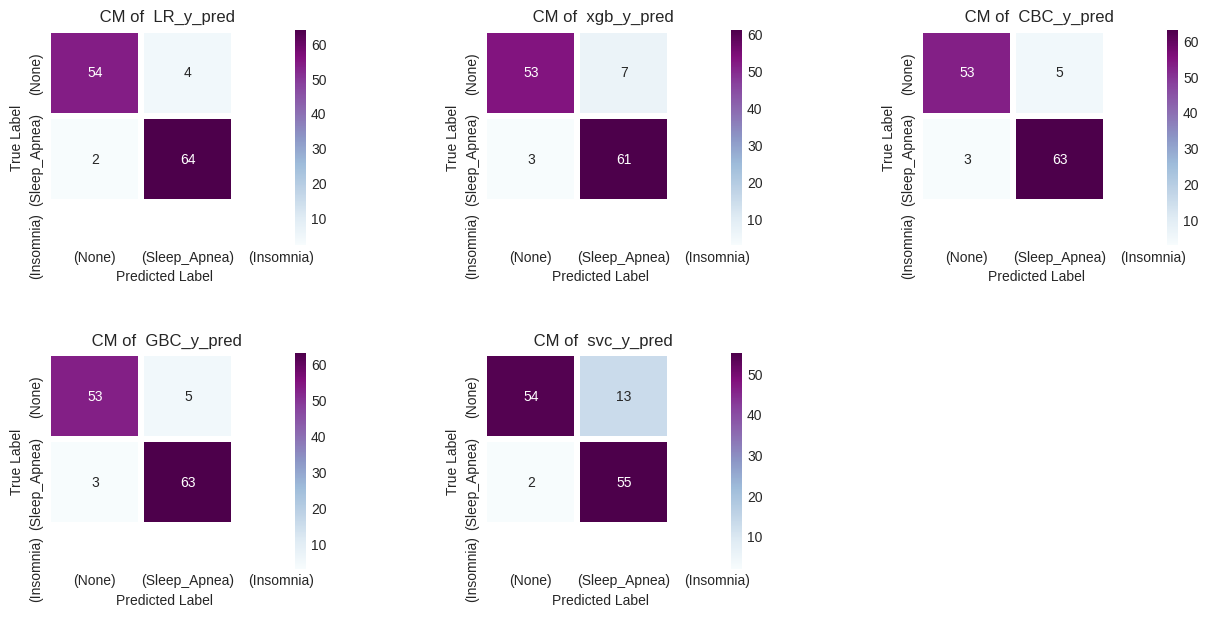

In [77]:
models_predictions=[LR_y_pred,xgb_y_pred,CBC_y_pred,GBC_y_pred,svc_y_pred]
model={1:'LR_y_pred',2:'xgb_y_pred',3:'CBC_y_pred',4:'GBC_y_pred',5:'svc_y_pred'}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :

    cm = confusion_matrix(y_pred,y_test)

    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

# Interpretation one model

머신러닝(XGBoost)을 설명가능하도록 SHAP 분석 실행
- SHAP(SHapley Additive exPlanations) 를 사용해서 각 변수(feature)가 예측에 얼마나 영향을 주었는지 시각화

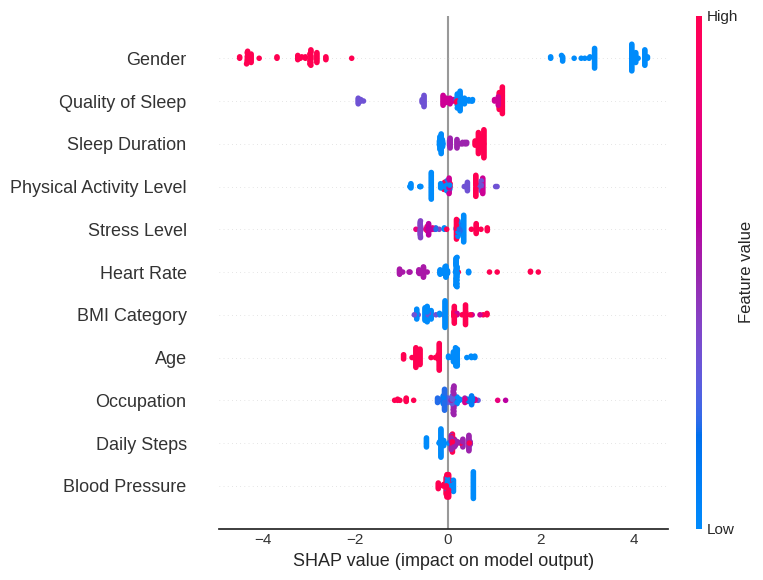

In [78]:
import shap

shap_values = shap.TreeExplainer(xgb).shap_values(x_test)
shap.summary_plot(shap_values, x_test,class_names=['None','Sleep_Apnea','Insomnia'])

1. Gender
- Feature 값이 높은 경우(빨강) → 오른쪽으로 퍼짐 → Insomnia 또는 Sleep Apnea 예측에 긍정적 기여
성별이 예측 결과에 큰 영향을 줌
2. Quality of Sleep
- SHAP 값 분포 넓음 → 모델이 예측을 내릴 때 많이 참고하는 변수
낮은 수면의 질(파랑)은 Sleep Apnea/Insomnia 예측에 기여하는 것으로 보임
3. Blood Pressure, Daily Steps
- SHAP 분포 좁고 대부분 0 근처 → 예측에 큰 영향이 없음

그래프 해석법

| 항목        | 의미                                       |
| --------- | ---------------------------------------- |
| **Y축**    | 변수 이름 (중요도 순 정렬됨)                        |
| **X축**    | SHAP value → **모델의 예측에 대한 영향 크기**        |
| **점의 색상** | 해당 feature의 **값 자체가 높은지(빨강) 낮은지(파랑)**    |
| **점의 위치** | 해당 feature 값이 해당 클래스 예측에 **얼마나 영향을 줬는지** |
